In [1]:
# import intake
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import gribscan
import intake

# TLDR

Get the data

In [2]:
resolution='tco2559-ng5-cycle3'
#datapath='/work/bm1235/a270046/cycle3/multio_cycle3/gribscan_1h6h_native/'
datapath2='/work/bm1235/a270046/cycle3/multio_cycle3/gribscan_1h6h_native/example_c3/json.dir.c2/'
datapath3='/work/bm1235/a270046/cycle3/multio_cycle3/gribscan_1h6h_native/example_c3/json.dir.c3/'
datazarr2=datapath2+'atm2d.json' # all 2D surface fields, this is the whole dataset; atm3d.json for pl
datazarr3=datapath3+'atm2d.json' # all 2D surface fields, this is the whole dataset; atm3d.json for pl
data2 = xr.open_zarr("reference::"+datazarr2, consolidated=False)
data3 = xr.open_zarr("reference::"+datazarr3, consolidated=False)

In [4]:
#cat = intake.open_catalog("../catalog.yaml")
#run = cat.IFS["tco2559-ng5-cycle3"]
#data = run.ICMGG_atm2d.to_dask()
data=data3

Get the grid

In [5]:
model_lon = data.lon.values
model_lat = data.lat.values
nonan = ~((np.isnan(model_lon)) | (np.isnan(model_lat)))
lat_nonan = model_lat[nonan]
lon_nonan = model_lon[nonan]
lon_nonan = np.where(lon_nonan>180, lon_nonan-360, lon_nonan)

In [6]:
lon = np.linspace(-30, 60, 90*10)
lat = np.linspace(33, 72, (72-33)*10)
lon2, lat2 = np.meshgrid(lon, lat)
points_ifs = np.vstack((lon_nonan, lat_nonan)).T

Pick a variable

In [30]:
data_sample2 = data2['2t'][0:5,15] # (first entries x random point)
data_sample3 = data3['2t'][0:5,15] # (first entries x random point)
#data_sample = data['t'][1,1,:] # 3D pl variables

What else is in the dataset?

In [31]:
data3

<xarray.Dataset>
Dimensions:  (time: 3, value: 26306560)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 ... 2020-01-30T17:00:00
Dimensions without coordinates: value
Data variables:
    2t       (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [32]:
data2

<xarray.Dataset>
Dimensions:  (time: 5, value: 26306560)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-30T13:00:00 ... 2020-01-30T17:00:00
Dimensions without coordinates: value
Data variables:
    2t       (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [33]:
data_sample2.values

array([246.02236938, 246.15022278, 246.28663635, 246.50205994,
       246.93618774])

In [34]:
data_sample3.values

array([242.15324402, 242.09510803, 242.08383179])

(240.0, 247.0)

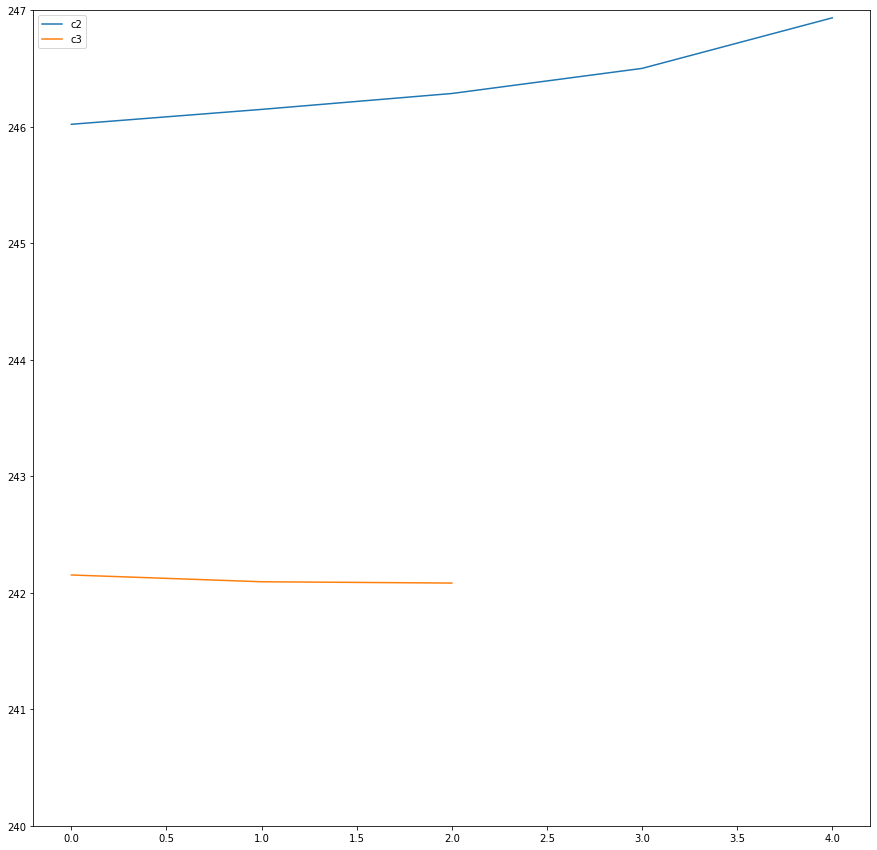

In [35]:
plt.figure(figsize=(15,15))
plt.plot(data_sample2.values, label='c2')
plt.plot(data_sample3.values, label='c3')
plt.legend()
plt.ylim((240,247))

In [43]:
data_sample2 = data2['2t'][2,:]
data_sample3 = data3['2t'][2,:]

In [44]:
nn_interpolation2 = NearestNDInterpolator(points_ifs, data_sample2.values[nonan])
interpolated_nn2 = nn_interpolation2((lon2, lat2))

In [45]:
nn_interpolation3 = NearestNDInterpolator(points_ifs, data_sample3.values[nonan])
interpolated_nn3 = nn_interpolation3((lon2, lat2))

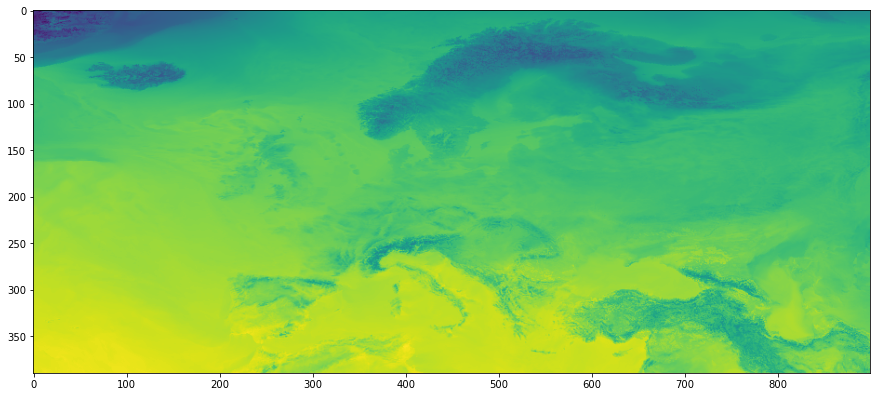

In [46]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn2))

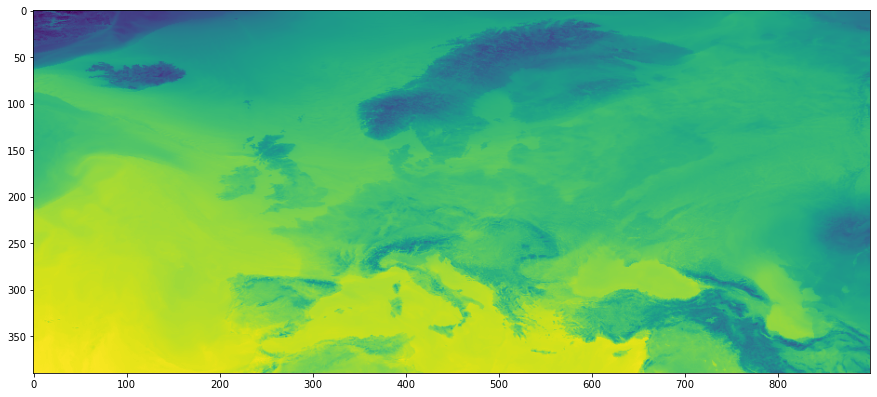

In [47]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn3))